In [1]:
import cv2
import matplotlib.pyplot as plt

# Images

### Importing pretrained MobileNet model from tensorflow

In [2]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [7]:
classlabels = [] #empty list to save labels names
filename = 'labels.txt'
with open(filename, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')
print(len(classlabels))
print(classlabels)

81
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'Footer']


These are the number of labels that our model can detect

### Setting new attributes for the model

In [4]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5)) #cause I used MobileNet
model.setInputSwapRB(True)

<dnn_Model 000001E457F5AC50>

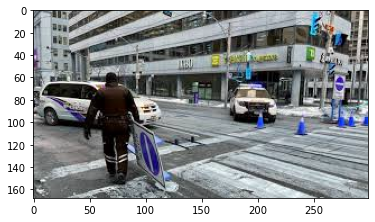

In [8]:
img = cv2.imread("images3.jpeg") #openc.read mekes the photos BGR so next we will convert it to RGB
classindex, confidece, bbox = model.detect(img, confThreshold = 0.5)
fontscale = 1
font = cv2.FONT_HERSHEY_PLAIN
plt.imshow(img)

person
car
traffic light
car
car
car
traffic light
fire hydrant
car


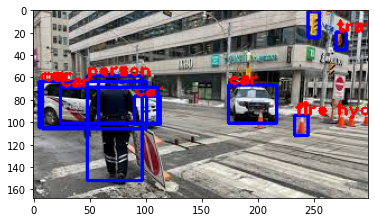

In [10]:
for classind, conf, boxes in zip(classindex, confidece, bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, classlabels[classind - 1], (boxes[0] , boxes[1] ), font, fontscale, color =  (0,0,255), thickness=2)
    print(classlabels[classind - 1])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Videos

In [11]:
cap = cv2.VideoCapture("Car - 28132.mp4")
font_scale = 3
#check if the vid is not opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture()
if not cap.isOpened():
    raise IOError("Cannot open the video")

In [12]:
while True:
    st, frame = cap.read()
    classindex, confidece, bbox = model.detect(frame)
    if len(classindex) != 0:
        for classind, conf, boxes in zip(classindex.flatten(), confidece.flatten(), bbox):
            if (classind <= 80):
                cv2.rectangle(frame, boxes, (255,0,0),2)
                cv2.putText(frame, classlabels[classind-1], (boxes[0]+10, boxes[1]+40), font,font_scale, color = (0,255,0))
            cv2.imshow("Object_Detection", frame)
    if cv2.waitKey(2) & 0xFF == ord("x"):
        break
        
cap.release()
cv2.destroyAllWindows()